### Outliers
- An outlier is a data point or observation that significantly differs from the rest of the data in a dataset.

Identify Outliers
- using scatter plots
- Box plot
- using z score
- using the IQR interquantile range

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

In [4]:
# Creating a sample dataset
np.random.seed(42)
data=np.random.normal(loc=50,scale=10,size=100) # loc-mean,scale-std
outliers=np.array([10,110,5,120])
data=np.concatenate([data,outliers])

In [8]:
data.shape

(104,)

In [11]:
# Creating dataframe
df=pd.DataFrame(data,columns=['Values'])
df.head()

,Values
0,54.967142
1,48.617357
2,56.476885
3,65.230299
4,47.658466


In [12]:
df.tail()

,Values
99,47.654129
100,10.000000
101,110.000000
102,5.000000
103,120.000000


#### Identifying the outliers

***1. using Scatter plot***

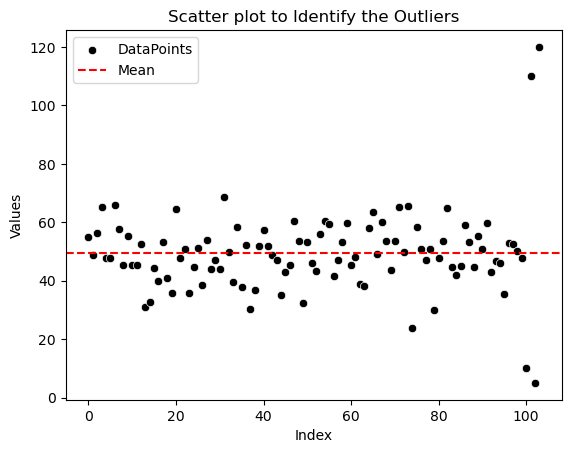

In [35]:

sns.scatterplot(df['Values'],color='black',label='DataPoints')
plt.axhline(y=df['Values'].mean(),label='Mean',linestyle='--',color='red')
# axhline (axis horizontal line)
plt.xlabel('Index')
plt.ylabel('Values')
plt.title('Scatter plot to Identify the Outliers')
plt.legend()
plt.show()

***2. using Box plot***

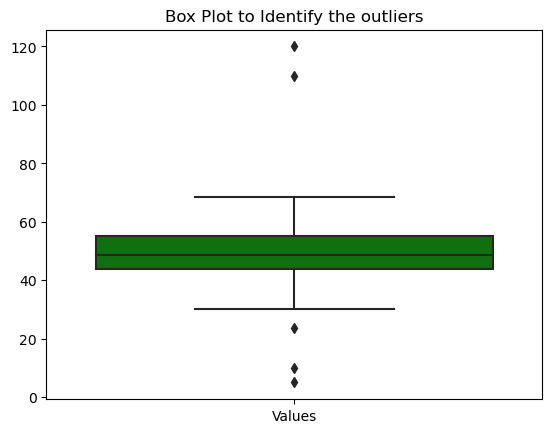

In [39]:

sns.boxplot(df,color='green')
plt.title('Box Plot to Identify the outliers')
plt.show()

***3. Using Z-Score***
- Formula z = (X – μ) / σ
- X => Data Point
- μ =>  Mean of dataset
- σ => Standard deviation

Steps:
1. compute zscore for each data point.
2. if z-score >3 or z-score <-3 ,mark it as an outlier

In [46]:
df['z-score']=zscore(df['Values'])
df.loc[(df['z-score']>3) | (df['z-score']<-3)] # Outliers

,Values,z-score
101,110.0,4.328173
102,5.0,-3.175368
103,120.0,5.042796


***4. Interquartile Range (IQR) Method***

 IQR = Q3 - Q1
Steps:
1. Calculate Q1(25th percentile) and Q3(75th percentile)
2. Compute IQR = Q3-Q1
3. Define lower and upper bounds
    - Lower Bound =Q1-1.5*IQR
    - Upper Bound = Q3+1.5*IQR
4. Any value outside these bounds is an outlier

In [51]:
Q1=df['Values'].quantile(0.25)
Q3=df['Values'].quantile(0.75)
IQR=Q3-Q1

# Bounds 
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [52]:
lower_bound

27.17321545886533

In [53]:
upper_bound

71.70971029326903

In [61]:
df.loc[(df['Values']<lower_bound) | (df['Values']>upper_bound) ] # Outliers

,Values,z-score
74,23.802549,-1.831694
100,10.000000,-2.818056
101,110.000000,4.328173
102,5.000000,-3.175368
103,120.000000,5.042796


***Final Summary***
1. Scatter plot → Outliers appear far from the mainn cluster.
2. Box Plot → Outliers are outside the whiskers
3. zscore → Outliers are zscore>3 or zscroe <-3
4. IQR → outside ( Q1-1.5*IQR,Q3+1.5*IQR)


**Finding Outliers Using the IQR Method with a 5-Number Summary**
The 5-number summary consists of:
 
Minimum (Q0) → The smallest value in the dataset.
 
First Quartile (Q1) → The 25th percentile (lower quartile).
 
Median (Q2) → The 50th percentile (middle value).
 
Third Quartile (Q3) → The 75th percentile (upper quartile).
 
Maximum (Q4) → The largest value in the dataset.

The Interquartile Range (IQR) is calculated as:
 
IQR=Q3−Q1
 
Any value outside the range:
 
[Q1−1.5×IQR,Q3+1.5×IQR]  is considered an outlier.

In [63]:
df.head()

,Values,z-score
0,54.967142,0.395399
1,48.617357,-0.058371
2,56.476885,0.503289
3,65.230299,1.128828
4,47.658466,-0.126896


In [74]:
Q1=df['Values'].quantile(0.25)
Q2=df['Values'].median()
Q3=df['Values'].quantile(0.75)
min_value=df['Values'].min()
max_value=df['Values'].max()

IQR=Q3-Q1

# Bounds 
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"5-Number Summary:\nQ1 : {Q1},\nQ2 : {Q2},\nQ3 : {Q3},\nMax : {max_value},\nMin : {min_value}")
print(f"Lower Bound :{lower_bound},\nUpper Bound : {upper_bound}")
print(f"Outliers are: {list((df.loc[(df['Values']<lower_bound) | (df['Values']>upper_bound) ]).Values)}") # Outliers

5-Number Summary:
Q1 : 43.874401021766715,
Q2 : 48.73043708220287,
Q3 : 55.00852473036764,
Max : 120.0,
Min : 5.0
Lower Bound :27.17321545886533,
Upper Bound : 71.70971029326903
Outliers are: [23.802548959102555, 10.0, 110.0, 5.0, 120.0]
